# $\color{blue}{\text{Chapter 1. Feature Engineering}}$
**과목명:  응용데이터애널리틱스 (Applied Data Analytics)** \\
**학수번호:  INE4108** \\
**교강사:  송재욱 교수 (산업공학과)** \\
 \\
***

상가 매매 실거래가 데이터 (http://rtdown.molit.go.kr/)

분석 기간 : 2017.08. ~ 2020.07

상가의 매매 금액을 예측하는데 ㎡당 가격을 y 값으로 사용하여 매매 금액 예측


모델에 데이터를 적합하기 전에 데이터 셋을 전처리
분석에 필요한 feature 가공 및 추출
- 변수 유형 파악 및 올바른 데이터 타입 설정
- Null value 처리
- Outlier 처리
- 파생변수 생성
- Categorical 변수 처리

###$\color{blue}{\text{1.0. Environmental Set-up & Data Loading}}$

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Google Drive where you have saved the unzipped
FOLDERNAME =  'ADX/'

assert FOLDERNAME is not None, 'ERROR'

%cd drive/My\ Drive
%cp -r $FOLDERNAME ../../

Mounted at /content/drive
/content/drive/My Drive


In [ ]:
# 한글 나눔포트 사용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (3,888 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and di

In [ ]:
# import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [ ]:
df = pd.read_csv('./ADX/Data_RealEstate/dataset.csv', encoding ='cp949')  # 한글 Encoding 문제로 encoding = 'cp949'

###$\color{blue}{\text{1.1. 변수 유형 파악 및 올바른 데이터 타입 설정}}$

In [ ]:
df.head()

,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),대지면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도
0,서울특별시강남구개포동,일반,1***,논현로,준주거,제2종근린생활,25m이상,381.42,367.3,"550,000",NaN,201708,23,1993.0
1,서울특별시강남구개포동,일반,1**,선릉로10길,준주거,제2종근린생활,8m미만,535.20,207.8,"390,000",NaN,201708,29,1987.0
2,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,NaN,"39,500",1.0,201709,4,1997.0
3,서울특별시강남구개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,82.70,NaN,"60,000",NaN,201709,14,1984.0
4,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,NaN,"15,000",1.0,201709,27,1983.0


In [ ]:
df.dtypes

시군구           object
유형            object
지번            object
도로명           object
용도지역          object
건축물주용도        object
도로조건          object
전용/연면적(㎡)    float64
대지면적(㎡)      float64
거래금액(만원)      object
층            float64
계약년월           int64
계약일            int64
건축년도         float64
dtype: object

In [ ]:
import datetime
import math
#################################################################################
# TODO: 데이터 타입 처리                                                        #
#                                                                               #
# 1. 계약 년월, 계약일을 datetime 형식으로 변환 (datetime.datetime 함수 사용)   #
# 2. 건축년도 nan 값 처리 및 datetime 형식으로 변환 (datetime.datetime 함수사용)#
# 3. 거래금액 string -> float 로 형변환 (Dataframe.apply 사용)                  #
# 4. 변수명은 계약년월_adj, 건축년도_adj, '거래금액(만원)_adj' 저장             #
#################################################################################

#1, 4 계약 년월과 계약일 datetime형식으로 변환하여 저장

contract_date = []

for i, j in np.array(df[['계약년월', '계약일']]):
        
    contract_date.append(datetime.datetime(int(str(i)[:4]), int(str(i)[4:6]), int(j)))

df['계약년월_adj'] = contract_date

#2, 4 건축년도 nan 값 처리 및 date time형식으로 변환하여 저장

#건축년도 결측값은 제거
df.dropna(subset = ['건축년도'], inplace=True)

#건축년도가 0년인 것도 제거
idx = df[df['건축년도']==0].index
df = df.drop(idx)

construct_year = []
for i in np.array(df[['건축년도']]):
    
    construct_year.append(pd.to_datetime(datetime.datetime(int(i), 1, 1).year, format = '%Y'))

df['건축년도_adj'] = construct_year

#3 거래금액 형식 변환

df['거래금액(만원)_adj'] = df['거래금액(만원)'].apply(lambda x: x.replace(',','')).astype('float')

In [ ]:
df.dtypes

시군구                     object
유형                      object
지번                      object
도로명                     object
용도지역                    object
건축물주용도                  object
도로조건                    object
전용/연면적(㎡)              float64
대지면적(㎡)                float64
거래금액(만원)                object
층                      float64
계약년월                     int64
계약일                      int64
건축년도                   float64
계약년월_adj        datetime64[ns]
건축년도_adj        datetime64[ns]
거래금액(만원)_adj           float64
dtype: object

###$\color{blue}{\text{1.2. Null value 처리}}$
`대지면적`, `층`,  `도로 조건`가 비어 있어도 예측이 가능하게 설계,

쉬운 방법으로는 해당 컬럼을 지우거나 default 값, 최빈값 또는 평균 값으로 대체하거나 연관있는 다른 컬럼을 참조하여 Null 값 채움


In [ ]:
# 각 컬럼별로 null 값의 비율을 확인
for i in df.columns :
    X_i = df.loc[:,i].replace('-', np.nan) # 도로조건은 -가 null 값 (데이터를 출력하여 확인 필요)
    print("column {} : {} not null ratio".format(i,X_i.dropna().shape[0]/df.shape[0]))
    print(df.loc[:,i].unique())
    print("")
    print()
    
    

column 시군구 : 1.0 not null ratio
['서울특별시강남구개포동' '서울특별시강남구논현동' '서울특별시강남구대치동' '서울특별시강남구도곡동' '서울특별시강남구삼성동'
 '서울특별시강남구세곡동' '서울특별시강남구수서동' '서울특별시강남구신사동' '서울특별시강남구압구정동' '서울특별시강남구역삼동'
 '서울특별시강남구일원동' '서울특별시강남구자곡동' '서울특별시강남구청담동' '서울특별시강동구강일동' '서울특별시강동구고덕동'
 '서울특별시강동구길동' '서울특별시강동구둔촌동' '서울특별시강동구명일동' '서울특별시강동구상일동' '서울특별시강동구성내동'
 '서울특별시강동구암사동' '서울특별시강동구천호동' '서울특별시강북구미아동' '서울특별시강북구번동' '서울특별시강북구수유동'
 '서울특별시강북구우이동' '서울특별시강서구가양동' '서울특별시강서구공항동' '서울특별시강서구내발산동' '서울특별시강서구등촌동'
 '서울특별시강서구마곡동' '서울특별시강서구방화동' '서울특별시강서구염창동' '서울특별시강서구화곡동' '서울특별시관악구남현동'
 '서울특별시관악구봉천동' '서울특별시관악구신림동' '서울특별시광진구광장동' '서울특별시광진구구의동' '서울특별시광진구군자동'
 '서울특별시광진구능동' '서울특별시광진구자양동' '서울특별시광진구중곡동' '서울특별시광진구화양동' '서울특별시구로구가리봉동'
 '서울특별시구로구개봉동' '서울특별시구로구고척동' '서울특별시구로구구로동' '서울특별시구로구궁동' '서울특별시구로구신도림동'
 '서울특별시구로구오류동' '서울특별시구로구온수동' '서울특별시구로구천왕동' '서울특별시구로구항동' '서울특별시금천구가산동'
 '서울특별시금천구독산동' '서울특별시금천구시흥동' '서울특별시노원구공릉동' '서울특별시노원구상계동' '서울특별시노원구월계동'
 '서울특별시노원구중계동' '서울특별시노원구하계동' '서울특별시도봉구도봉동' '서울특별시도봉구방학동' '서울특별시도봉구쌍문동'
 '서울특별시도봉구창동' '서울특별시동대문구답십리동' '서울특별시동대문구신설동' '

In [ ]:
#################################################################################
# TODO: 합리적인 방법으로 Null 값을 처리                                        #
#                                                                               #
# 1. '대지면적(㎡)'은 거의다 비어있으므로 사용하지 않고                         #
# 2. '층'과 '도로조건'은 비어있는 값들을 최빈값을 대체 (DataFrame.replace 사용) # 
# 3. 건축년도가 비어있는 행은 제거 (index.isin 사용)                            #
# 4. 주요변수 전부 헨들링 되었으므로 그 외 nan이 존재하는 행은 드랍    
# 5. 다른 방법도 주석과 함께 제시 해볼 것.                                      #
#################################################################################

_columns = list(df.columns)
_columns.remove('대지면적(㎡)')
df_1 = df[_columns].copy()
for i in ['층','도로조건']:
  df_1.loc[:,i] = df.loc[:,i].replace(np.nan, df.loc[:,i].mode()[0])
df_1 = df_1.loc[df_1.loc[:, '건축년도'].dropna().index]
df_1 = df_1.dropna()
df_1


,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도,계약년월_adj,건축년도_adj,거래금액(만원)_adj
0,서울특별시강남구개포동,일반,1***,논현로,준주거,제2종근린생활,25m이상,381.42,"550,000",1.0,201708,23,1993.0,2017-08-23,1993-01-01,550000.0
1,서울특별시강남구개포동,일반,1**,선릉로10길,준주거,제2종근린생활,8m미만,535.20,"390,000",1.0,201708,29,1987.0,2017-08-29,1987-01-01,390000.0
2,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,"39,500",1.0,201709,4,1997.0,2017-09-04,1997-01-01,39500.0
3,서울특별시강남구개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,82.70,"60,000",1.0,201709,14,1984.0,2017-09-14,1984-01-01,60000.0
4,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,"15,000",1.0,201709,27,1983.0,2017-09-27,1983-01-01,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46869,서울특별시 중랑구 중화동,일반,3**,동일로,준주거,제1종근린생활,25m이상,676.04,"445,585",1.0,202005,29,1977.0,2020-05-29,1977-01-01,445585.0
46870,서울특별시 중랑구 중화동,일반,3**,중랑천로,제2종일반주거,숙박,25m미만,446.40,"217,000",1.0,202006,11,1983.0,2020-06-11,1983-01-01,217000.0
46871,서울특별시 중랑구 중화동,집합,2**,망우로,준주거,제1종근린생활,25m이상,34.88,"61,500",1.0,202006,24,2010.0,2020-06-24,2010-01-01,61500.0
46872,서울특별시 중랑구 중화동,집합,3**,중랑역로9길,제2종일반주거,제2종근린생활,8m미만,47.78,"15,000",1.0,202006,29,2018.0,2020-06-29,2018-01-01,15000.0


###$\color{blue}{\text{1.3. Outlier 처리}}$

해당 함수들을 참고하여 `히스토그램` 및 `산점도`를 그려보고 아웃라이어 처리

통계적인 분석이나 분포 그림 상 이상치를 제거

In [ ]:
### Column이 한글이면 에러가 발생할 수 있으므로 영문으로 사용하는 것을 추천 (아래 코드는 한글 폰트 사용)
### 각 plot 함수는 dataframe과 columns을 인풋으로 받아서 변수의 그림 출력
### plotHistogram은 histogram, plotPairplot은 컬럼별 scatter plot, plotBoxplot은 기준 컬럼(범주형 변수)에 대한 box plot
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

def plotHistogram(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    
    for _n, i in enumerate(columns):
        df.describe()
        fig=plt.figure(figsize=(20,8))
        fig.patch.set_facecolor('xkcd:white')

        plt.subplot(2,3,_n + 1)
        plt.title(i)
        df.loc[:,i].hist(bins=50)
    plt.show()
        
        
def plotPairplot(_df, columns):
    if type(columns) != list :
        print("columns 타입이 리스트가 아닙니다.")
    
        return
    sns.pairplot(_df.loc[:,columns])
    plt.show()

        
def plotBoxplot(_df, basis_col1, y_col2):
    _unique = _df.loc[:, basis_col1].unique()
    if len(_unique) < 50:
        print("기준 컬럼의 종류가 너무 많습니다.(50개 이상)")
    
    box_plot=[]
    count_ = []
    for n,i in enumerate(_unique):
        box_plot.append(list(_df[_df.loc[:, basis_col1]==i].loc[:, y_col2]))
        count_.append(len((list(_df[_df.loc[:, basis_col1]==i].loc[:, y_col2]))))

    print('Count   ',count_)
    plt.boxplot(box_plot, flierprops=dict(markerfacecolor='g', marker='D'));
    plt.xticks(range(1,len(_unique)+1),_unique)

Count    [32578, 310, 220, 859, 1252, 158, 3712, 440, 305, 436, 471, 239, 2144, 168, 19, 26, 44, 50, 645, 187, 41, 101, 75, 211, 94, 68, 24, 18, 11, 9, 8, 9, 15, 14, 4, 77, 125, 153, 42, 222, 28, 30, 160, 85, 5, 8, 9, 8, 2, 45, 36, 4, 7, 4, 3, 2, 4, 1, 1, 1, 2, 2, 1]


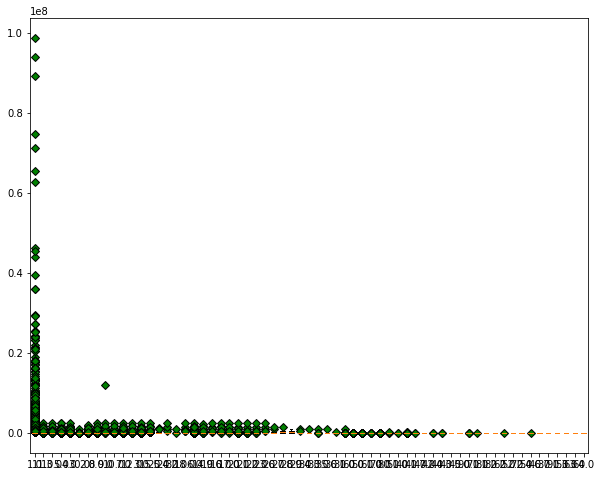

In [ ]:
plotBoxplot(df, '층', '거래금액(만원)_adj')

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50857 (\N{HANGUL SYLLABLE YONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 47732 (\N{HANGUL SYLLABLE MYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/

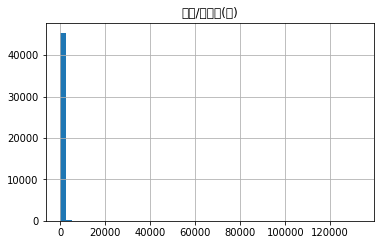

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52789 (\N{HANGUL SYLLABLE CEUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


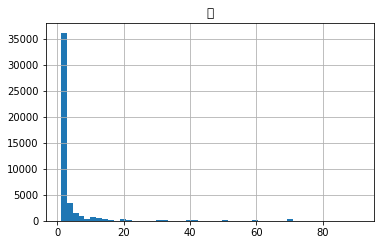

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


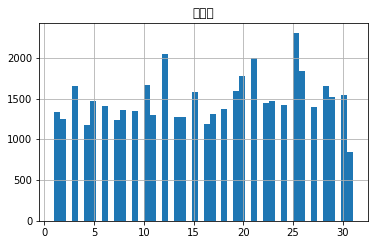

In [ ]:
plotHistogram(df, ['전용/연면적(㎡)', '층', '계약일'])

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 44144 (\N{HANGUL SYLLABLE GEO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 47000 (\N{HANGUL SYLLABLE RAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWarning: Glyph 47564 (\N{HANGUL SYLLABLE MAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:88: UserWa

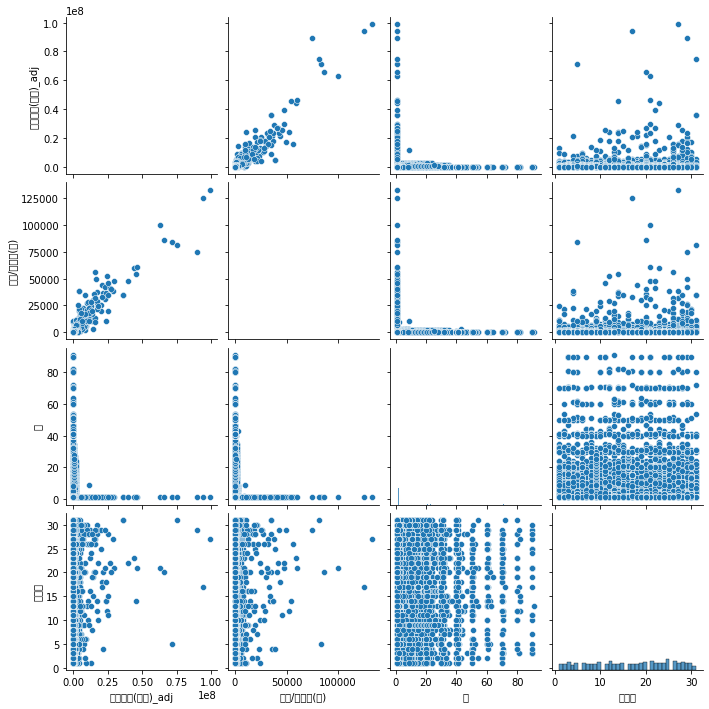

In [ ]:
plotPairplot(df, ['거래금액(만원)_adj', '전용/연면적(㎡)', '층', '계약일'])

In [ ]:
#################################################################################
# TODO: 합리적인 방법으로 이상치 값을 처리하고 산점도의 변화 확인               #
#                                                                               #
# 1. 1%의 이상치를 모두 제거, 층은 큰값 1%제거, 건축년도는 작은값 1% 제거       #
#  (np.where 사용)
# 2. 도로조건 '-' 제거                                                          #
#################################################################################
df_2 = df_1.copy()

# 위 df_2를 기반으로 작성할 것
# 층은 큰값 1% 제거, 건축년도는 작은값 1% 

df_2 = df_2.reset_index()
idx1 = np.where(df_2['층'] >= np.percentile(df_2['층'], 99))
idx2 = np.where(df_2['건축년도'] <= np.percentile(df_2['건축년도'], 1))
idx = []
idx = np.append(idx1[0], idx2[0])
df_2.drop(index = idx, inplace = True)
df_2.loc[:,'도로조건'] = df_1.loc[:, '도로조건'].replace('-',np.nan)
df_2 = df_2.dropna()
df_2


,index,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도,계약년월_adj,건축년도_adj,거래금액(만원)_adj
0,0,서울특별시강남구개포동,일반,1***,논현로,준주거,제2종근린생활,25m이상,381.42,"550,000",1.0,201708,23,1993.0,2017-08-23,1993-01-01,550000.0
1,1,서울특별시강남구개포동,일반,1**,선릉로10길,준주거,제2종근린생활,8m미만,535.20,"390,000",1.0,201708,29,1987.0,2017-08-29,1987-01-01,390000.0
2,2,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,"39,500",1.0,201709,4,1997.0,2017-09-04,1997-01-01,39500.0
3,3,서울특별시강남구개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,82.70,"60,000",1.0,201709,14,1984.0,2017-09-14,1984-01-01,60000.0
4,4,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,"15,000",1.0,201709,27,1983.0,2017-09-27,1983-01-01,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46027,46869,서울특별시 중랑구 중화동,일반,3**,동일로,준주거,제1종근린생활,25m이상,676.04,"445,585",1.0,202005,29,1977.0,2020-05-29,1977-01-01,445585.0
46028,46870,서울특별시 중랑구 중화동,일반,3**,중랑천로,제2종일반주거,숙박,25m이상,446.40,"217,000",1.0,202006,11,1983.0,2020-06-11,1983-01-01,217000.0
46029,46871,서울특별시 중랑구 중화동,집합,2**,망우로,준주거,제1종근린생활,25m이상,34.88,"61,500",1.0,202006,24,2010.0,2020-06-24,2010-01-01,61500.0
46030,46872,서울특별시 중랑구 중화동,집합,3**,중랑역로9길,제2종일반주거,제2종근린생활,25m이상,47.78,"15,000",1.0,202006,29,2018.0,2020-06-29,2018-01-01,15000.0


###$\color{blue}{\text{1.4. 파생변수 생성}}$

기존 변수를 이용하여 유의미한 파생 변수를 설정


In [ ]:
#################################################################################
# TODO: 예측의 유의미한 영향을 미칠 수 있는 파생변수 생성                       #
# - 건물가격을 바로 예측할 수 있지만, 평당가격을 예측하는 모델을 만들어 전용면적에
# 곱하여 사용하도록 모델 설계. (DataFrame.apply 사용)                                                                                
# 1. 지역구 단위의 행정구역 새로운 변수 생성 (변수명 '지역구') '서울특별시XX구' or '서울특별시 XX구 ', '구로구' 등 예외처리
# 2. 건물 년식 일 단위로 하여 새로운 변수 생성 (변수명 '건물년식') 
# 3. 평당가격 변수 추가 
# 4. 그 외의 합리적인 새로운 파생변수 생성                                
#################################################################################

# 건문년식 method 1 
df_3 = df_2.copy()
df_3.loc[:, '건물년식'] = df_2.apply(lambda x: (x['계약년월_adj'] - x['건축년도_adj']).days, axis = 1)

# 지역구 method 1 
address_ = []
for i in df_3.loc[:,'시군구']:
  index1_ = i.find('서울특별시')

  if i.find('구로구') != -1:
    index2_ = i.find('구로구')
    address_.append(i[index1_ + 5 : index2_+3].strip())
  else :
    index2_ = i.find('구')
    address_.append(i[index1_ +5 : index2_+1].strip())
df_3.loc[:, '지역구'] = address_

df_3['평당가격'] = df_2.apply(lambda x : (x['거래금액(만원)_adj']) / (x['전용/연면적(㎡)']), axis = 1)
df_3


,index,시군구,유형,지번,도로명,용도지역,건축물주용도,도로조건,전용/연면적(㎡),거래금액(만원),층,계약년월,계약일,건축년도,계약년월_adj,건축년도_adj,거래금액(만원)_adj,건물년식,지역구,평당가격
0,0,서울특별시강남구개포동,일반,1***,논현로,준주거,제2종근린생활,25m이상,381.42,"550,000",1.0,201708,23,1993.0,2017-08-23,1993-01-01,550000.0,9000,강남구,1441.979970
1,1,서울특별시강남구개포동,일반,1**,선릉로10길,준주거,제2종근린생활,8m미만,535.20,"390,000",1.0,201708,29,1987.0,2017-08-29,1987-01-01,390000.0,11198,강남구,728.699552
2,2,서울특별시강남구개포동,집합,1*,개포로,일반상업,판매,25m이상,17.64,"39,500",1.0,201709,4,1997.0,2017-09-04,1997-01-01,39500.0,7551,강남구,2239.229025
3,3,서울특별시강남구개포동,집합,1**,개포로,일반상업,제2종근린생활,25m미만,82.70,"60,000",1.0,201709,14,1984.0,2017-09-14,1984-01-01,60000.0,12310,강남구,725.513906
4,4,서울특별시강남구개포동,집합,1**,개포로,제3종일반주거,제1종근린생활,25m이상,9.00,"15,000",1.0,201709,27,1983.0,2017-09-27,1983-01-01,15000.0,12688,강남구,1666.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46027,46869,서울특별시 중랑구 중화동,일반,3**,동일로,준주거,제1종근린생활,25m이상,676.04,"445,585",1.0,202005,29,1977.0,2020-05-29,1977-01-01,445585.0,15854,중랑구,659.110408
46028,46870,서울특별시 중랑구 중화동,일반,3**,중랑천로,제2종일반주거,숙박,25m이상,446.40,"217,000",1.0,202006,11,1983.0,2020-06-11,1983-01-01,217000.0,13676,중랑구,486.111111
46029,46871,서울특별시 중랑구 중화동,집합,2**,망우로,준주거,제1종근린생활,25m이상,34.88,"61,500",1.0,202006,24,2010.0,2020-06-24,2010-01-01,61500.0,3827,중랑구,1763.188073
46030,46872,서울특별시 중랑구 중화동,집합,3**,중랑역로9길,제2종일반주거,제2종근린생활,25m이상,47.78,"15,000",1.0,202006,29,2018.0,2020-06-29,2018-01-01,15000.0,910,중랑구,313.938887


###$\color{blue}{\text{1.5. Categorical 변수 처리}}$

사용할 범주형 변수를 선택하여 처리

In [ ]:
CATEGORICAL = ['용도지역', '건축물주용도', '도로조건','지역구']
df_4 = df_3.loc[:,[ '전용/연면적(㎡)', '층', '건물년식', '평당가격', '거래금액(만원)_adj']]

In [ ]:
#################################################################################
# TODO:범주형 변수 처리                                                         #
#                                                                               #
# 범주형 변수를 Onehot encoding (Pandas.get_dummies 사용)                       #
# 변수의 종류당 하나의 dimension이 생기므로 차원이 매우 커짐. 따라서 해결할 수  #
# 있는 여러 존재하는데, 의미를 해석하여 ordinal하게 변수를 정의하거나 차원을    #
# 축소하는 MCA 알고리즘 등이 존재
# Ordinal 예시 : '용도지역'의 경우 평당 가격이 
# 상업지역 > ... > 준주거 > ... > 개발제한구역 이므로 이를 오름차순의 값으로 설정
#################################################################################

for i in CATEGORICAL :
  cate_i = pd.get_dummies(df_3.loc[:,i])
  df_4[cate_i.columns] = cate_i

In [ ]:
df_4

,전용/연면적(㎡),층,건물년식,평당가격,거래금액(만원)_adj,개발제한구역,근린상업,용도미지정,유통상업,일반상업,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,381.42,1.0,9000,1441.979970,550000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,535.20,1.0,11198,728.699552,390000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17.64,1.0,7551,2239.229025,39500.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,82.70,1.0,12310,725.513906,60000.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,9.00,1.0,12688,1666.666667,15000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46027,676.04,1.0,15854,659.110408,445585.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46028,446.40,1.0,13676,486.111111,217000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46029,34.88,1.0,3827,1763.188073,61500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
46030,47.78,1.0,910,313.938887,15000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1





[Task Completed] --------------------------------------------------------------------




In [ ]:
#### 실행하지 마세요!!!!!!!!!!!

df_4.to_pickle("./ADX/Data_RealEstate/dataset_preprocessing_team1re.pickle")